# Исследование факторов успешности компьютерных игр

В нашем распоряжении данные о продажах компьютерных игр до 2016 года, взятые из открытых источников.

<ins>**Цель исследования:**</ins>

*Необходимо выявить закономерности, определяющие успешность компьютерных игр.*

Результаты исследования позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017-й год.

# Описание данных

*Name* — название игры

*Platform* — платформа

*Year_of_Release* — год выпуска

*Genre* — жанр игры

*NA_sales* — продажи в Северной Америке (миллионы проданных копий)

*EU_sales* — продажи в Европе (миллионы проданных копий)

*JP_sales* — продажи в Японии (миллионы проданных копий)

*Other_sales* — продажи в других странах (миллионы проданных копий)

*Critic_Score* — оценка критиков (максимум 100)

*User_Score* — оценка пользователей (максимум 10)

*Rating* — рейтинг от организации ESRB

Расшифровка рейтинга **ESRB**: 

**E** - для всех, 0+

**E10+** - для всех, 10+

**M** - для взрослых, 17+

**T** - для подростков

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

### Загрузка данных

In [2]:
try:
    df = pd.read_csv('/datasets/games.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


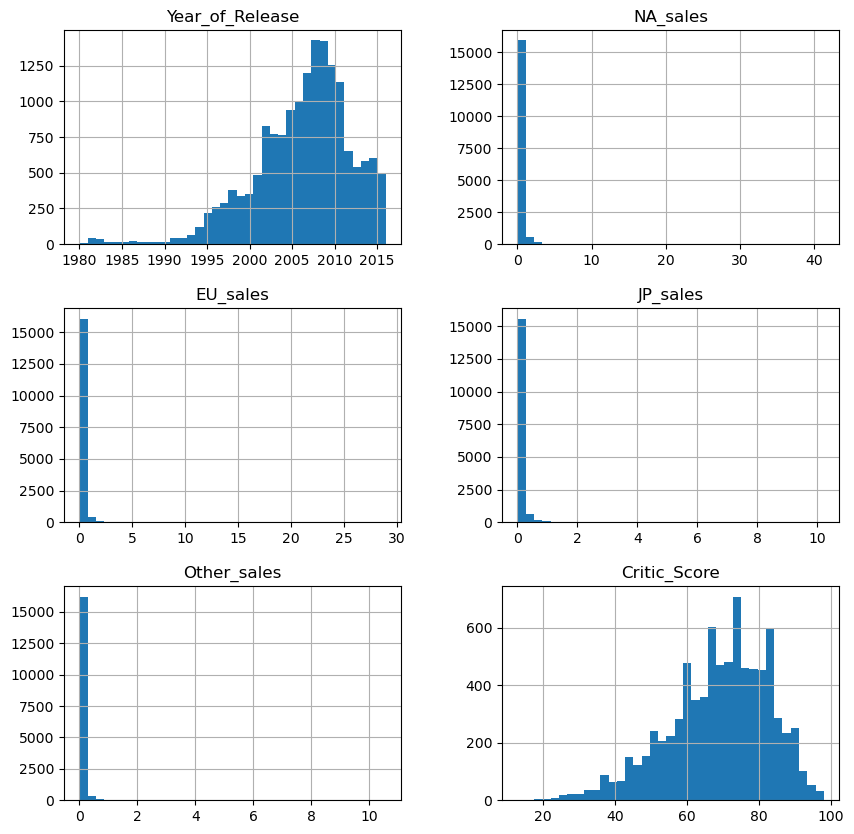

In [4]:
df.hist(bins=37, figsize=(10, 10))
plt.show()

В полученной таблице наблюдаются пропуски, неверный тип данных в некоторых столбцах. 

На гистограммах с продажами видно, что небольшой ряд игр имеет большой отрыв по продажам от большинства. В нашем исследовании будем считать эти данные выбросами.

На этапе предобработки данных:

* Приведем наименования столбцов к нижнему регистру
* Заполним пропуски, там, где это возможно
* Поменяем типы данных столбцов
* Проверим данные на дубликаты

### Предобработка данных

#### Наименования столбцов

Приведем наименования столбцов к нижнему регистру.

In [5]:
df.columns = df.columns.str.lower()

In [6]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Пропуски
Рассмотрим пропуски подробнее.

In [7]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### Пропуски
Рассмотрим пропуски подробнее.

Расчитаем долю пропусков в каждом столбце.

In [8]:
round(df.isna().sum() / df['platform'].count(), 2)

name               0.00
platform           0.00
year_of_release    0.02
genre              0.00
na_sales           0.00
eu_sales           0.00
jp_sales           0.00
other_sales        0.00
critic_score       0.51
user_score         0.40
rating             0.40
dtype: float64

Удалим пропуски в столбцах name, year_of_release и genre, это не повлияет на результаты исследования. Пропуски в данных столбцах могли быть допущены случайно или из-за технического сбоя.

In [9]:
df = df.dropna(subset=['name','year_of_release','genre'])

Пропуски в столбце rating, предположительно, могли появиться из-за того, что данные игры не получили оценок, поскольку могли быть выпущены до того как появилась система ESRB или в этом регионе необязательно, чтобы играм был присвоен рейтинг системой ESRB, может таких игр больше всего в каком-то определенном регионе или просто еще не успели их оценить. Заменим пропуски в данном столбце значением "unknown".

In [10]:
df['rating'] = df['rating'].fillna('unknown')

In [11]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating                0
dtype: int64

В строках critic_score, user_score пропуски оставим, т.к. нет подходящего инструмента, для их корректного заполнения.

Возможно данная часть игр малоизвестна, из-за чего оценок для них не приведено. Не исключен и технический сбой.

#### Типы данных

Поменяем типы данных столбцов.

In [12]:
df['year_of_release'] = df['year_of_release'].astype(int)

При замене типа данных столбца user_score происходит ошибка, рассмотрим значения в нем подробнее.

In [13]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
df.query('user_score == "tbd"')['name'].count()

2376

In [15]:
df.query('user_score == "0"')['name'].count()

1

Заменим значения 'tbd' на nan.

*Рейтинг TBD (To Be Determined — «будет определено») — это способ оценки проектов или задач, которые еще не были выполнены, но вынуждены быть оценены.*

In [16]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [17]:
df['user_score'] = df['user_score'].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.4+ MB


#### Дубликаты

Найдем дубликаты. Одинаковых имен у игр много, поэтому учтем в поиске платформу и год выпуска игры.

In [19]:
df[['name','platform', 'year_of_release']].duplicated().sum()

1

In [20]:
df.loc[df[['name','platform', 'year_of_release']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


Удалим дубликат.

In [21]:
df = df.drop(labels = 16230)
df.reset_index(drop=True, inplace=True)

#### Суммарные продажи

Запишем суммарные продажи во всех регионах для каждой игры в отдельный столбец.

In [22]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int32(1), object(4)
memory usage: 1.4+ MB


#### Работа с выбросами

Рассмотрим подробнее разброс значений по продажам игр.

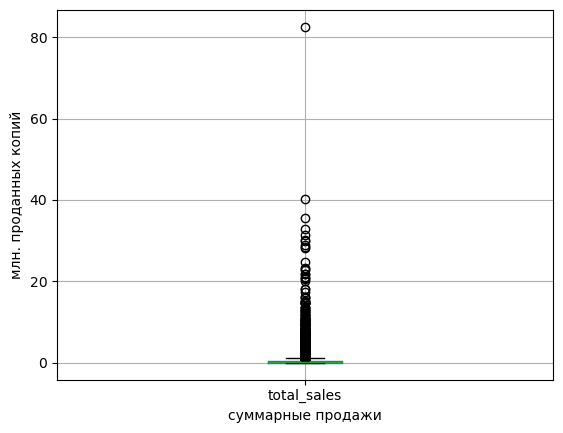

In [24]:
df.boxplot('total_sales')
plt.ylabel('млн. проданных копий')
plt.xlabel('суммарные продажи')
plt.show()

В данных много "выбросов", представляющих из себя популярные игры, продажи которых сильно выделяются. Оставим эти данные для возможности отдельного анализа единичных популярных игр. Сделаем график более наглядным для основной массы игр.

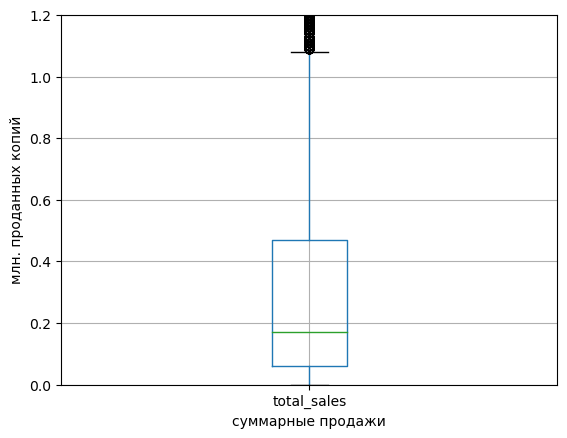

In [25]:
df.boxplot('total_sales')
plt.ylim(0, 1.2)
plt.ylabel('млн. проданных копий')
plt.xlabel('суммарные продажи')
plt.show()

In [26]:
df['total_sales'].describe()

count    16443.000000
mean         0.536055
std          1.558828
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

In [27]:
df.query('total_sales == 0')['total_sales'].count()

2

Удалим данные об играх с нулевыми продажами.

In [28]:
for i in range(len(df)):
    if df.loc[i, 'total_sales'] == 0:
        try:
            df = df.drop(labels = i)
        except:
            pass

In [29]:
df.reset_index(drop=True, inplace=True)

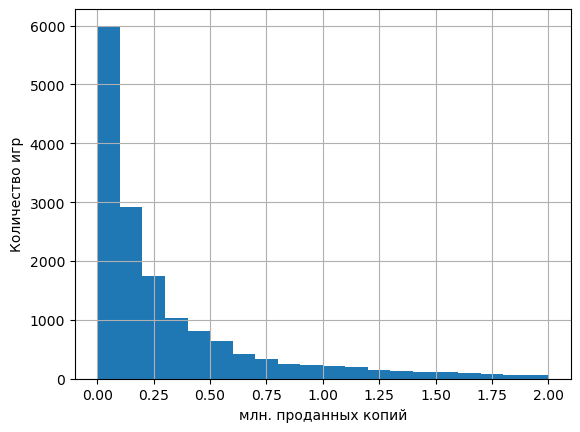

In [30]:
df['total_sales'].hist(bins=20, range=(0, 2))
plt.xlabel('млн. проданных копий')
plt.ylabel('Количество игр')
plt.show()

**Вывод:**

Основная масса игр имеет небольшие продажи. При проведении исследования будем опираться на игры, продажи которых не превышают 2 млн. проданных копий. Игры, продающиеся бо́льшим тиражом, будем считать исключениями, т.к. они могут сильно исказить результаты исследования.

### Исследовательский анализ данных

#### Год выпуска
Расмотрим подробнее, сколько игр выпускалось в разные годы. 

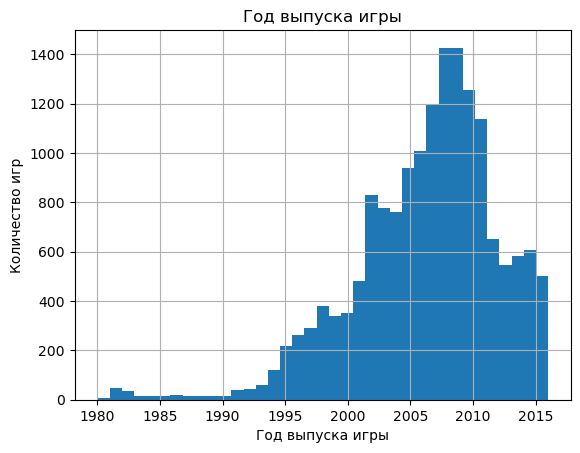

In [31]:
df['year_of_release'].hist(bins=37)
plt.title('Год выпуска игры')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество игр')
plt.show()

Данные в таблице представлены за период с 1980 до 2016 года. За этот период времени появлялись, прекращали свое существование и видоизменялись платформы, появлялись новые возможности и сами игры и жанры, как следствие. Предлагается рассмотреть тенденции за **актуальный период** - последние 5 лет: **с 2012 по 2016 год**. В этот период количество выпускаемых игр от года к году не сильно менялось.

#### Платформа
Расмотрим подробнее, как менялись продажи по платформам. 

In [32]:
t1 = df.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10)
t1

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Рассмотрим топ-6 платформ, которые сильно отличаются по количеству продаж от остальных.

In [33]:
t1 = t1.head(6)
t1.index

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')

In [34]:
t = df.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').reset_index()
t

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
233,XB,2008,0.18
234,XOne,2013,18.96
235,XOne,2014,54.07
236,XOne,2015,60.14


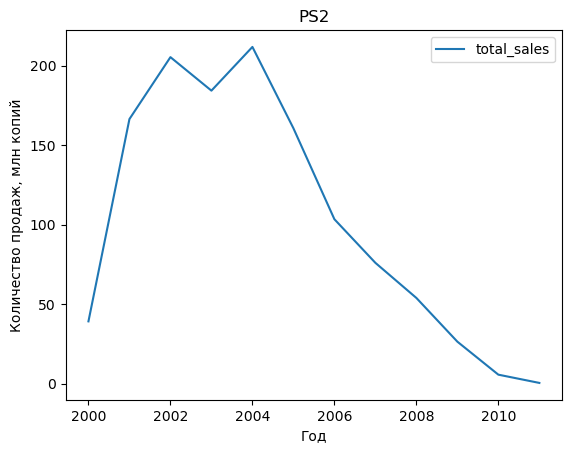

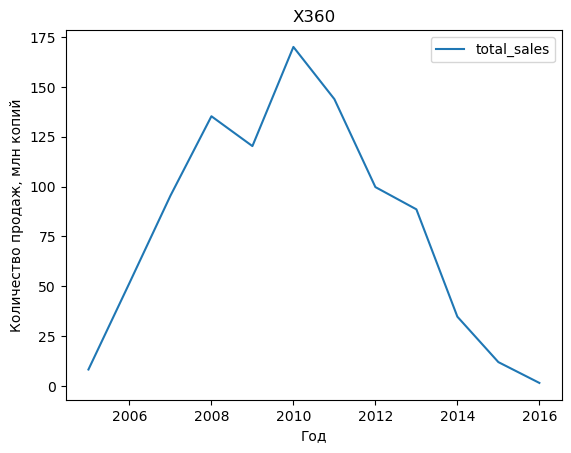

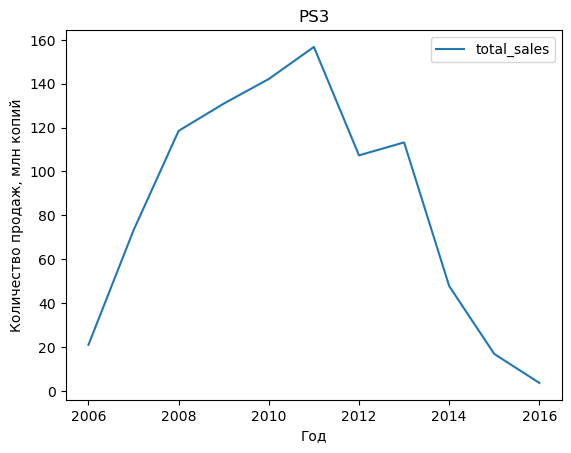

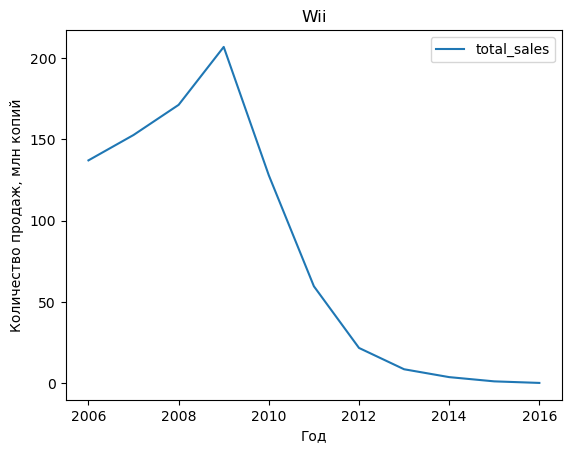

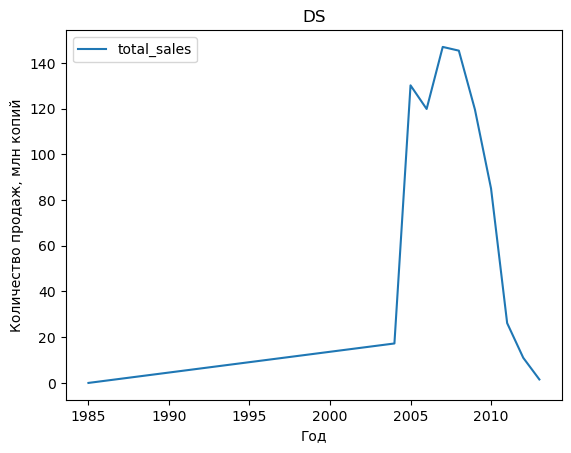

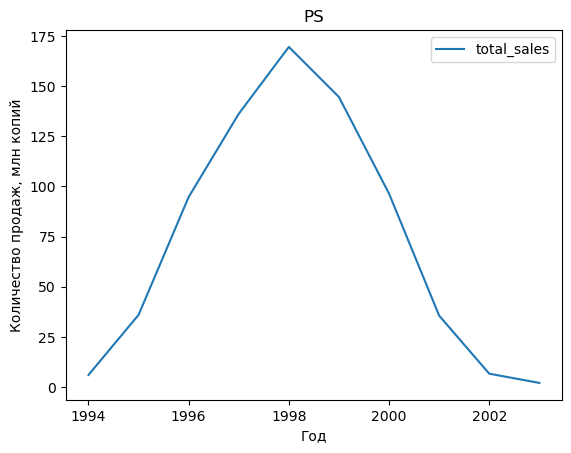

In [35]:
for i in t1.index:
    t[t['platform'] == i].plot(x='year_of_release', y='total_sales')
    plt.title(i)
    plt.xlabel('Год')
    plt.ylabel('Количество продаж, млн копий')
    plt.show()

Рассчитаем среднюю продолжительность жизни платформы:

In [36]:
t2 = df.pivot_table(index='platform', values='total_sales', aggfunc='sum').reset_index()
t2['y'] = 0

for i in t['platform'].unique():
    b = t[t['platform'] == i]['year_of_release'].max()
    c = t[t['platform'] == i]['year_of_release'].min()
    t2[t2['platform'] == i] = b - c
print('Средняя продолжительность актуальности платформы составляет', t2['y'].median(), 'лет')

Средняя продолжительность актуальности платформы составляет 6.0 лет


#### Данные за период 2012 - 2016 год
Создадим отдельный датафрейм для дальнейшей работы.

In [37]:
df_actual = df.query('year_of_release >= 2012')
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2885 entries, 16 to 16440
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2885 non-null   object 
 1   platform         2885 non-null   object 
 2   year_of_release  2885 non-null   int32  
 3   genre            2885 non-null   object 
 4   na_sales         2885 non-null   float64
 5   eu_sales         2885 non-null   float64
 6   jp_sales         2885 non-null   float64
 7   other_sales      2885 non-null   float64
 8   critic_score     1311 non-null   float64
 9   user_score       1530 non-null   float64
 10  rating           2885 non-null   object 
 11  total_sales      2885 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 281.7+ KB


#### Актуальные платформы
Рассмотрим актуальные платформы

In [38]:
df_actual['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

In [39]:
t = df_actual.pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum').reset_index()

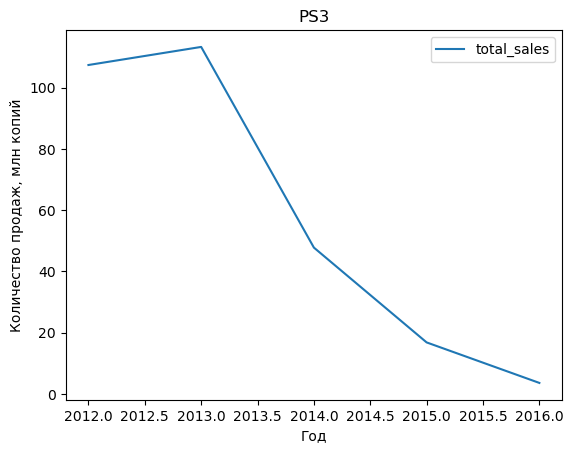

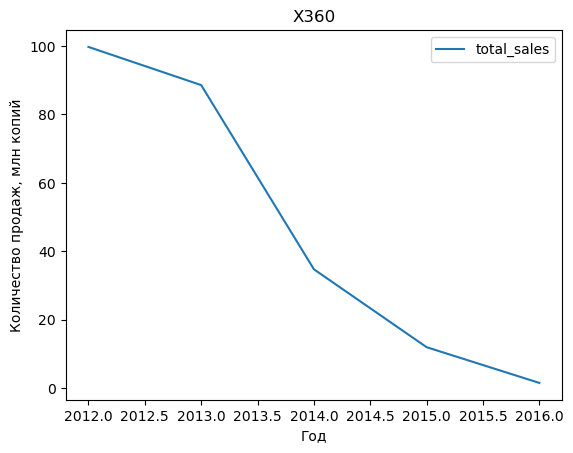

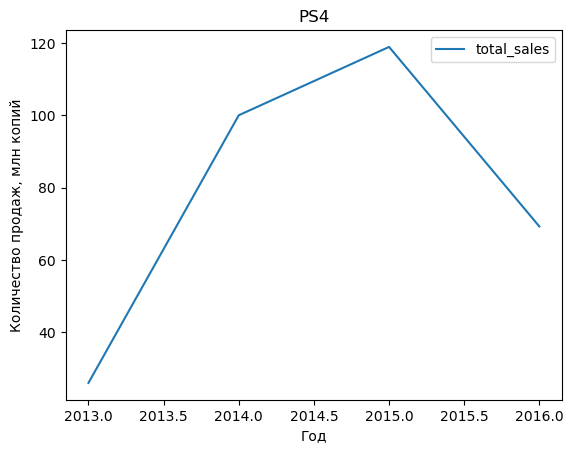

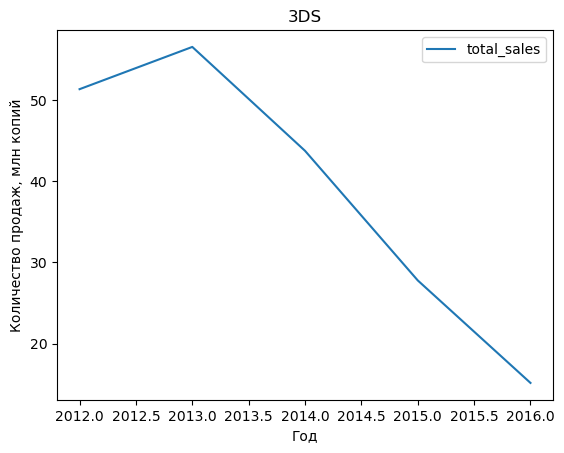

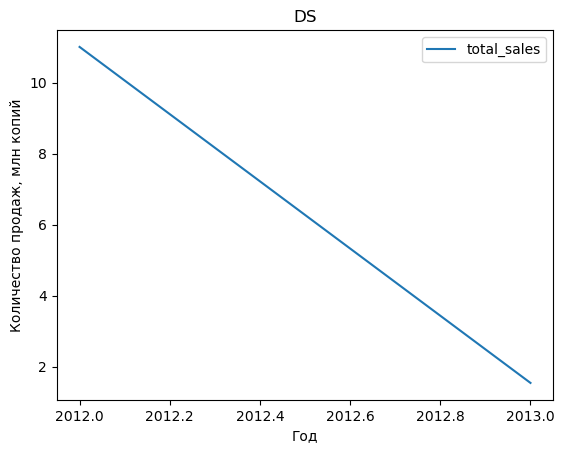

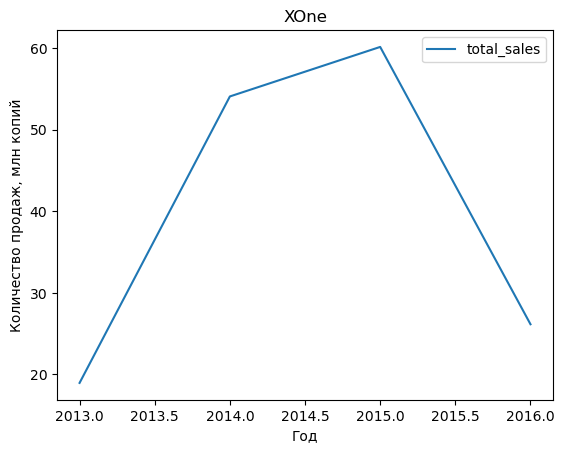

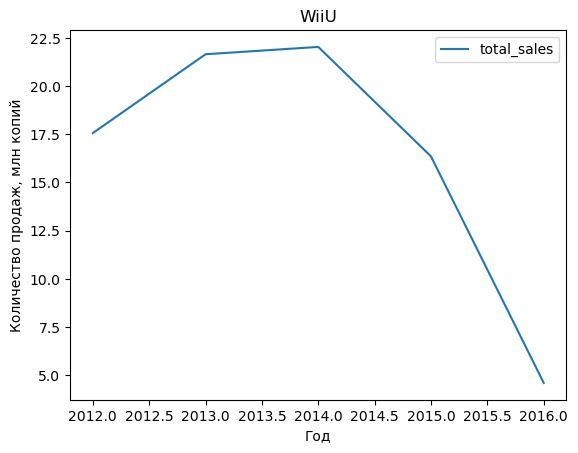

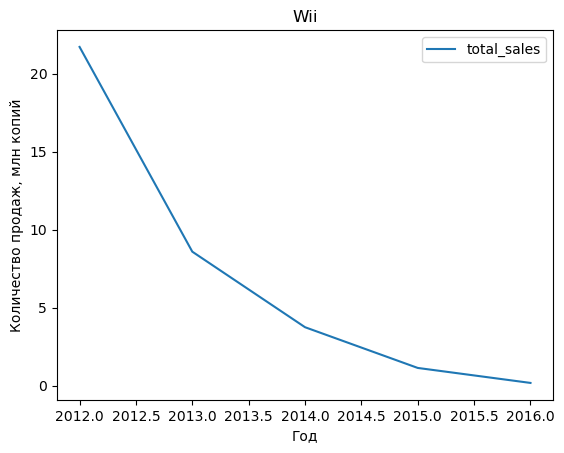

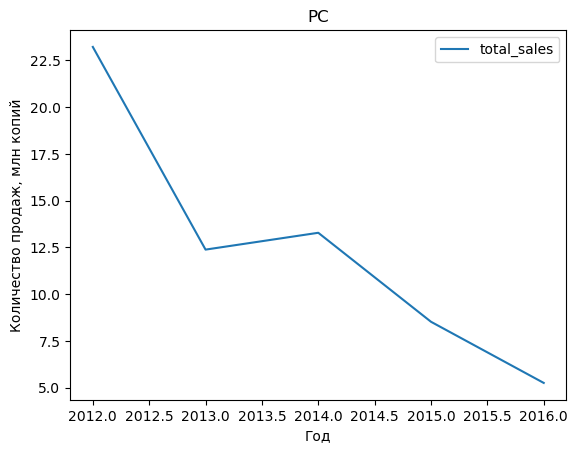

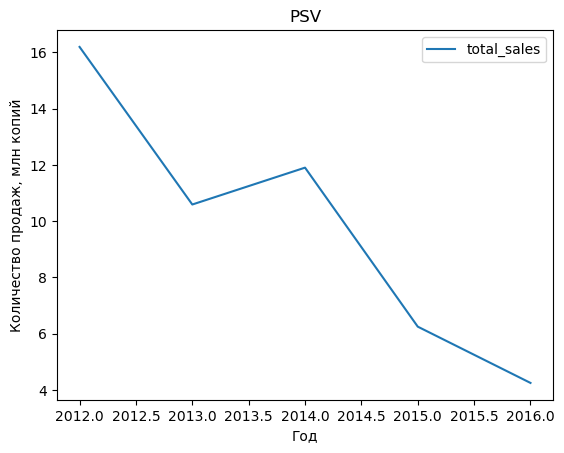

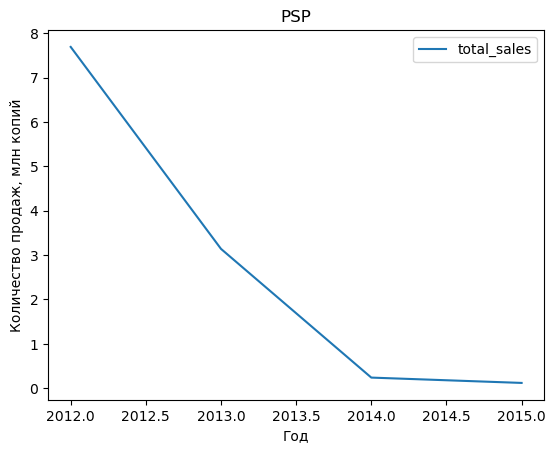

In [40]:
for i in df_actual['platform'].unique():
    t[t['platform'] == i].plot(x='year_of_release', y='total_sales')
    plt.title(i)
    plt.xlabel('Год')
    plt.ylabel('Количество продаж, млн копий')
    plt.show()

По всем выбранным платформам наблюдается спад продаж. Посмотрим на статистику в общем за последние 5 лет:

In [41]:
df_actual.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')

,total_sales
year_of_release,
2012,355.83
2013,361.24
2014,331.53
2015,267.98
2016,129.94


Посчитаем сумму продаж за последний год по каждой платформе:

In [42]:
df_actual.query('year_of_release == 2016').pivot_table(index='platform', values='total_sales', aggfunc='sum')

,total_sales
platform,
3DS,15.14
PC,5.25
PS3,3.60
PS4,69.25
PSV,4.25
Wii,0.18
WiiU,4.60
X360,1.52
XOne,26.15


Продажи игр за последние пять лет идут на спад, похожая картина наблюдается для каждой платформы отдельно. Самыми перспективными на основе объема продаж за 2016 год выглядят PS4, XOne, 3DS.

#### Ящик с усами по глобальным продажам игр в разбивке по платформам

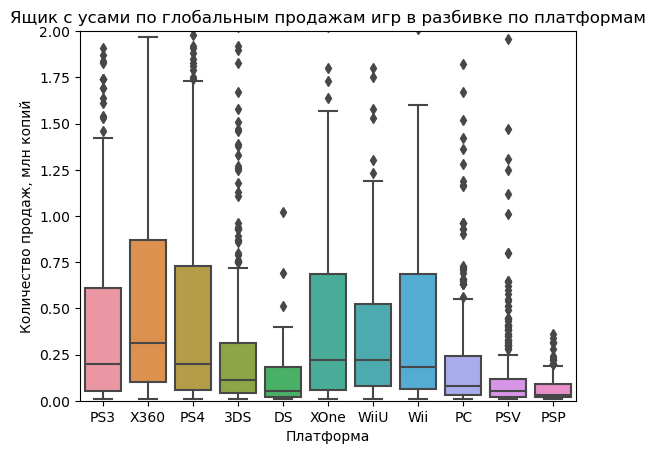

In [43]:
sns.boxplot(x= 'platform',
            y= 'total_sales',
            data=df_actual)
plt.title('Ящик с усами по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж, млн копий')
plt.ylim(0, 2)
plt.show()

In [44]:
df_actual.groupby(by='platform')['total_sales'].describe().sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
X360,292.0,0.810068,1.712069,0.01,0.1000,0.31,0.8700,16.27
WiiU,147.0,0.559116,1.058836,0.01,0.0800,0.22,0.5250,7.09
XOne,247.0,0.645020,1.036139,0.01,0.0600,0.22,0.6850,7.39
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.20,0.7300,14.63
PS3,492.0,0.586951,1.464113,0.01,0.0500,0.20,0.6100,21.05
Wii,54.0,0.655000,1.165447,0.01,0.0625,0.18,0.6875,6.76
3DS,396.0,0.491439,1.387161,0.01,0.0400,0.11,0.3125,14.60
PC,250.0,0.250600,0.494640,0.01,0.0300,0.08,0.2400,5.14
DS,31.0,0.404839,1.439245,0.01,0.0200,0.05,0.1850,8.06


После построения ящика с усами можно сделать следующий вывод:

Лидирование платформ по общему количеству продаж не обеспечивает высокое медианное значение количества продаж. Это значит, что высокие показатели общего количества проданных копий связаны с большим количеством выпущенных игр для этой платформы.

Обновим вывод о перспективных платформах на основе полученных данных:

**Наиболее перспективными** платформами, в порядке убывания, являются **X360, WiiU, XOne, PS4, PS3, Wii.**

Из списка исключена платформа 3DS из-за низкого показателя медианы количества продаж, а также из-за малого значения верхноего показателя столбца 75%(третьего квартиля), это также свидетельствует о том, что большинство игр продается малыми тиражами.

PS3 и PS4 поменяны местами (в отличие от таблицы выше), т.к. PS4 более новая платформа и она будет более актуальной (на основе данных по платформам PS за предыдущие годы).

#### Влияние отзывов на продажи

##### X360

Рассмотрим влияние отзывов пользователей и критиков на продажи на примере **платформы X360**. 

Популярные игры могут сильно повлиять на результат анализа, поэтому влияние отзывов будем изучать на основе данных об играх, продажи которых не превышают 2 млн. копий.

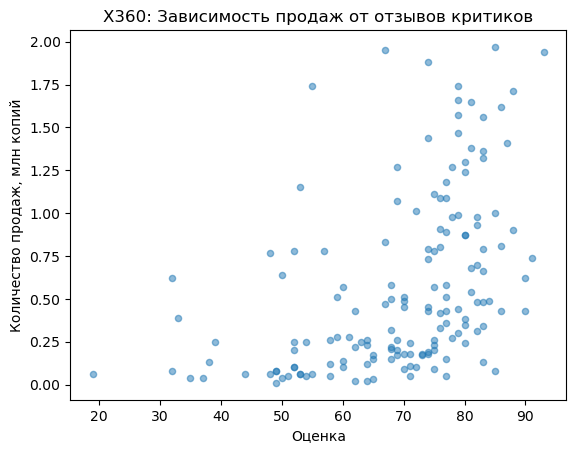

In [45]:
df_actual_X360 = df_actual.query('platform == "X360" and total_sales <= 2')
df_actual_X360.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('X360: Зависимость продаж от отзывов критиков')
plt.xlabel('Оценка')
plt.ylabel('Количество продаж, млн копий')
plt.show()

Зависимость прослеживается, посчитаем коэффициент корреляции далее.

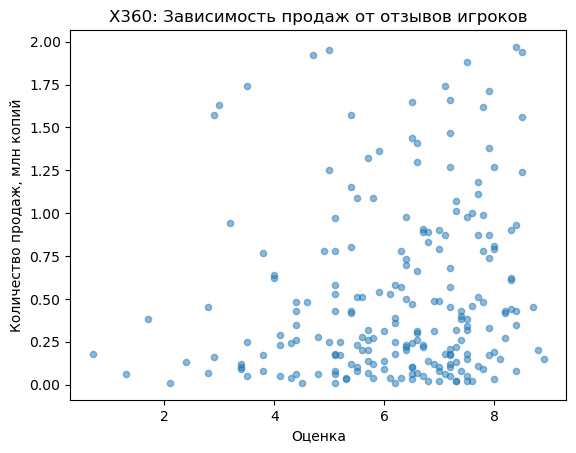

In [46]:
df_actual_X360.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('X360: Зависимость продаж от отзывов игроков')
plt.xlabel('Оценка')
plt.ylabel('Количество продаж, млн копий')
plt.show()

Трудно судить по графику о зависимости, возможно она есть, но слабая.

In [47]:
df_actual_X360_user = df_actual_X360.query('user_score > 0')
df_actual_X360_user['user_score'].corr(df_actual_X360_user['total_sales'])

0.14994061252001664

In [48]:
df_actual_X360['critic_score'].corr(df_actual_X360['total_sales'])

0.45596137977671203

**Для платформы X360:**

Зависимость количества проданных копий **от оценок игроков положительная**, но очень **слабая** (коэффициент корреляции **0.15**).

Зависимость количества проданных копий **от оценок критиков положительная**, и достаточно **заметная** (коэффициент корреляции **0.46**).

##### WiiU

Рассмотрим влияние отзывов пользователей и критиков на продажи на примере **платформы WiiU**. 

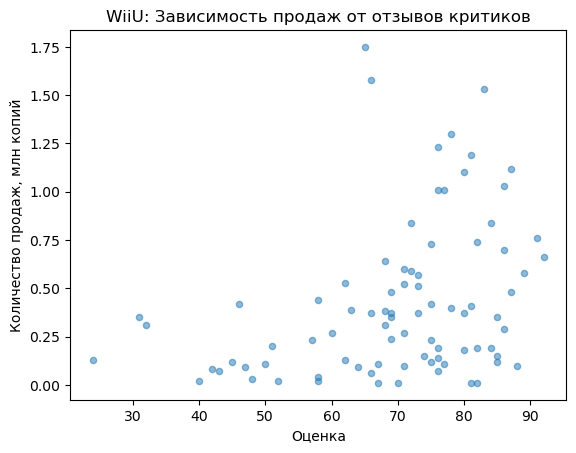

In [49]:
df_actual_WiiU = df_actual.query('platform == "WiiU" and total_sales <= 2')
df_actual_WiiU.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('WiiU: Зависимость продаж от отзывов критиков')
plt.xlabel('Оценка')
plt.ylabel('Количество продаж, млн копий')
plt.show()

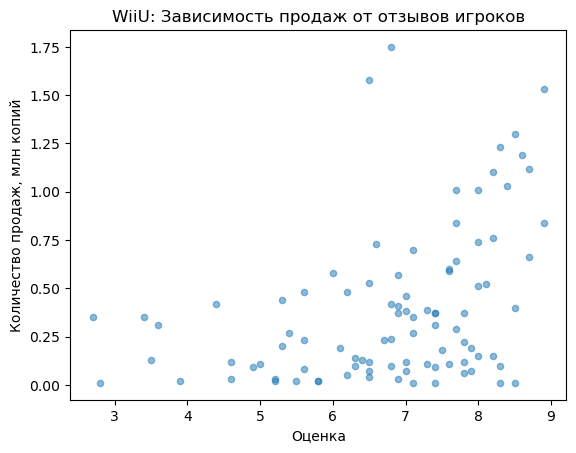

In [50]:
df_actual_WiiU.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('WiiU: Зависимость продаж от отзывов игроков')
plt.xlabel('Оценка')
plt.ylabel('Количество продаж, млн копий')
plt.show()

In [51]:
df_actual_WiiU_user = df_actual_WiiU.query('user_score > 0')
df_actual_WiiU_user['user_score'].corr(df_actual_WiiU_user['total_sales'])

0.39071339802019467

In [52]:
df_actual_WiiU['critic_score'].corr(df_actual_WiiU['total_sales'])

0.33134079284705176

**Для платформы WiiU:**

Зависимость количества проданных копий **от оценок игроков положительная**, и достаточно **заметная** (коэффициент корреляции **0.39**).

Зависимость количества проданных копий **от оценок критиков положительная**, и достаточно **заметная** (коэффициент корреляции **0.33**).

##### XOne

Рассмотрим влияние отзывов пользователей и критиков на продажи на примере **платформы XOne**. 

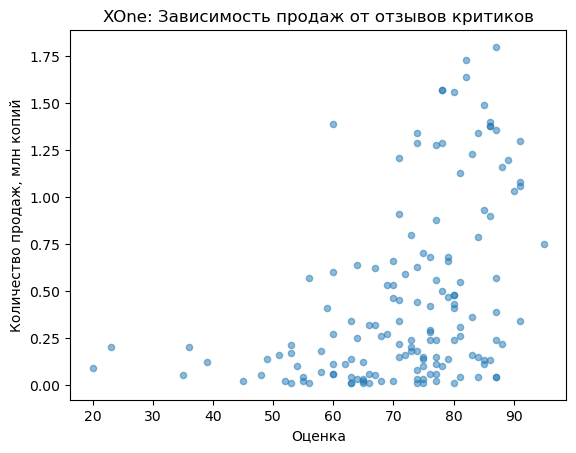

In [53]:
df_actual_XOne = df_actual.query('platform == "XOne" and total_sales <= 2')
df_actual_XOne.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('XOne: Зависимость продаж от отзывов критиков')
plt.xlabel('Оценка')
plt.ylabel('Количество продаж, млн копий')
plt.show()

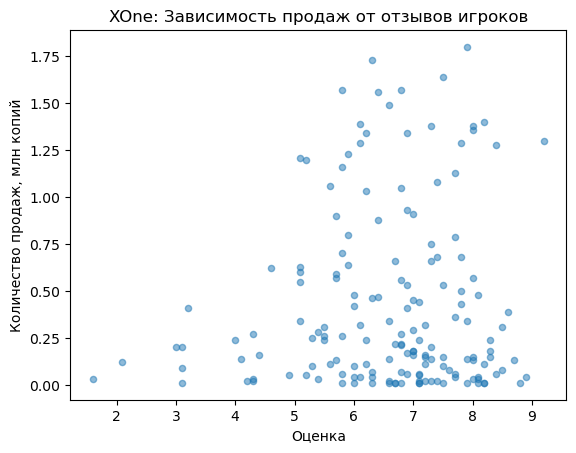

In [54]:
df_actual_XOne.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.5)
plt.title('XOne: Зависимость продаж от отзывов игроков')
plt.xlabel('Оценка')
plt.ylabel('Количество продаж, млн копий')
plt.show()

In [55]:
df_actual_XOne_user = df_actual_XOne.query('user_score > 0')
df_actual_XOne_user['user_score'].corr(df_actual_XOne_user['total_sales'])

0.07989048879133732

In [56]:
df_actual_XOne['critic_score'].corr(df_actual_XOne['total_sales'])

0.43369651269944526

**Для платформы X360:**

Зависимость количества проданных копий **от оценок игроков практически не прослеживается** (коэффициент корреляции **0.08**).

Зависимость количества проданных копий **от оценок критиков положительная**, и достаточно **заметная** (коэффициент корреляции **0.43**).

##### По всем платформам

Рассчитаем общие коэффициенты корреляции по всем платформам:

In [57]:
df_actual_user = df_actual.query('user_score > 0')
df_actual_user['user_score'].corr(df_actual_user['total_sales'])

0.004194481106917209

In [58]:
df_actual['critic_score'].corr(df_actual['total_sales'])

0.3086333612897608

**Вывод:**

В среднем:

Зависимость количества проданных копий **от оценок игроков не прослеживается**(коэффициент корреляции **0.06**).

Зависимость количества проданных копий **от оценок критиков положительная**, но **относительно слабая** (коэффициент корреляции **0.32**).

При этом корреляция индивидуальна для каждой платформы. Для каких-то платформ больше важны оценки критиков, для других - оценки игроков, для некоторых - оценки не вляют на продажи.

#### Распределение игр по жанрам

Рассмотрим игры каких жанров в среднем продаются лучше остальных. Будем сравнивать жанры по медианному значению проданных копий.

In [59]:
temp = df_actual.pivot_table(index='genre', values='total_sales', aggfunc=['count', 'sum', 'median'])
temp.columns = ['count', 'sum', 'median']
temp.sort_values(by='median', ascending=False)

,count,sum,median
genre,,,
Shooter,235,304.73,0.440
Sports,267,181.06,0.240
Platform,85,61.00,0.210
Role-Playing,370,192.80,0.140
Racing,115,53.50,0.140
Fighting,109,44.49,0.130
Action,1031,441.12,0.120
Misc,192,85.04,0.120
Simulation,80,35.12,0.120


Медианное значение количества проданных копий **выше всего у шутеров, спортивных игр и платформеров**.

Самые **низкие показатели** медианы продаж у **приключенческих игр**, при их большом количестве. 

Также интересная картина с **экшенами**, хоть жанр и лидирует по количеству выпущенных игр  и суммарным продажам, в среднем игры этого жанра продаются хуже, чем бо́льшая часть игр других жанров.

### Портреты пользователей разных регионов

#### Самые популярные платформы (топ-5)

##### Самые популярные платформы в Северной Америке

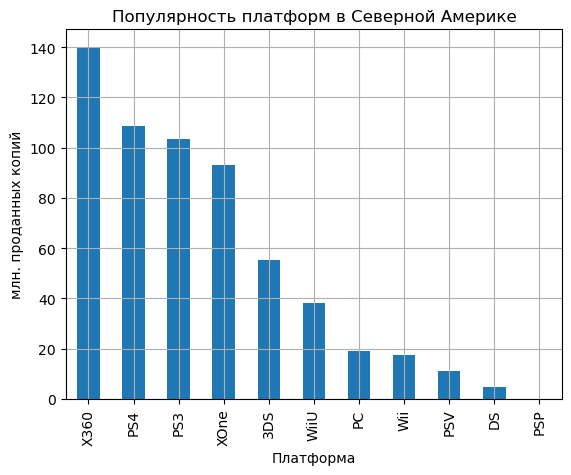

In [60]:
df_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar', grid=True)
plt.title('Популярность платформ в Северной Америке')
plt.ylabel('млн. проданных копий')
plt.xlabel('Платформа')
plt.show()

**Топ 5** в Северной Америке:
1. X360 - 23,2%
2. PS3 - 20,5%
3. XOne - 15,4%
4. PS4 - 15,0%
5. 3DS - 7,9%

Общая доля рынка, принадлежащая топовым платформам - 81,8%

##### Самые популярные платформы в Европе

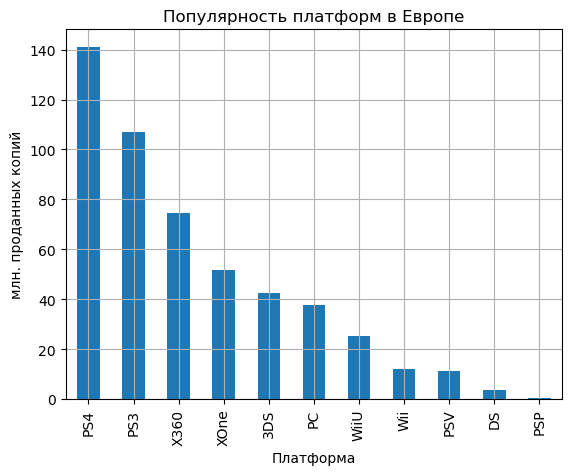

In [61]:
df_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar', grid=True)
plt.title('Популярность платформ в Европе')
plt.ylabel('млн. проданных копий')
plt.xlabel('Платформа')
plt.show()

**Топ 5** в Европе:
1. PS4 - 27,8%
2. PS3 - 21,1%
3. X360 - 14,7%
4. XOne - 10,2%
4. 3DS - 8,4%

Общая доля рынка, принадлежащая топовым платформам - 82,2%

##### Самые популярные платформы в Японии

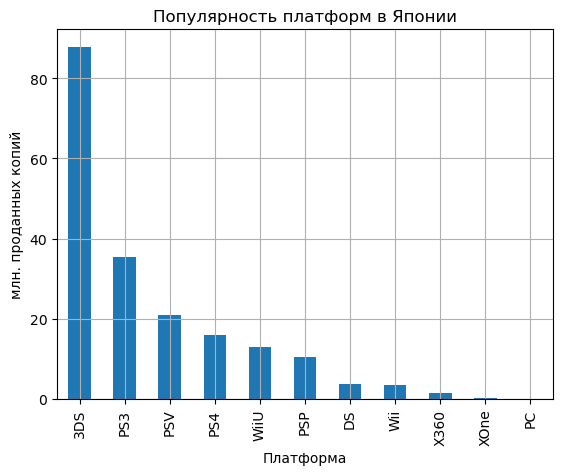

In [62]:
df_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar', grid=True)
plt.title('Популярность платформ в Японии')
plt.ylabel('млн. проданных копий')
plt.xlabel('Платформа')
plt.show()

**Топ 5** в Японии:
1. 3DS - 45,6%
2. PS3 - 18,3%
3. PSV - 10,9%
4. PS4 - 8,3%
5. Wiiu - 6,8%

Общая доля рынка, принадлежащая топовым платформам - 89,9%

**Выводы:**

1. Во всех трех регионах наблюдаются различия в популярных платформах: 
* в Северной Америке - **X360**
* в Европе - **PS4**
* в Японии - **3DS**
2. Во всех трех регионах наблюдаются **общая популярная платформа - PS3**
3. Самое неравномерное распределение **в Японии, почти 50% рынка** занимает всего 1 платформа **3DS**.
4. Топы платформ в Северной Америке и Европе схожи, содержат одинаковый список платформ и отличаются от Японского топа.

#### Самые популярные жанры (топ-5)

##### Самые популярные жанры в Северной Америке

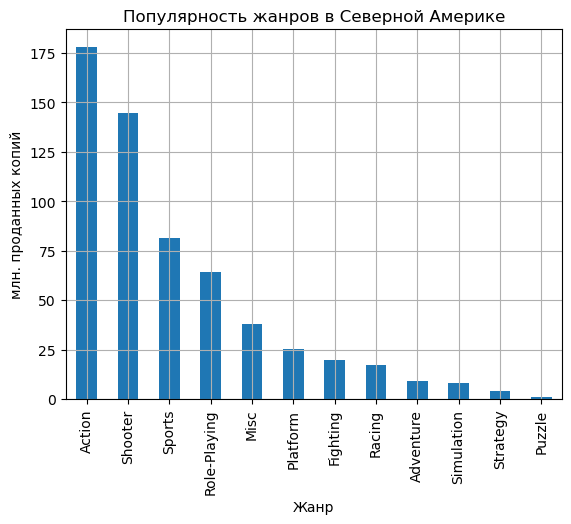

In [63]:
df_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).plot(kind='bar', grid=True)
plt.title('Популярность жанров в Северной Америке')
plt.ylabel('млн. проданных копий')
plt.xlabel('Жанр')
plt.show()

**Топ 5** в Северной Америке:
1. Action - 30.1%
2. Shooter - 24.5%
3. Sports - 13.8%
4. Role-Plaing - 10.8%
5. Misc - 6.5%

Общая доля рынка, принадлежащая топовым жанрам - 85.7%

##### Самые популярные платформы в Европе

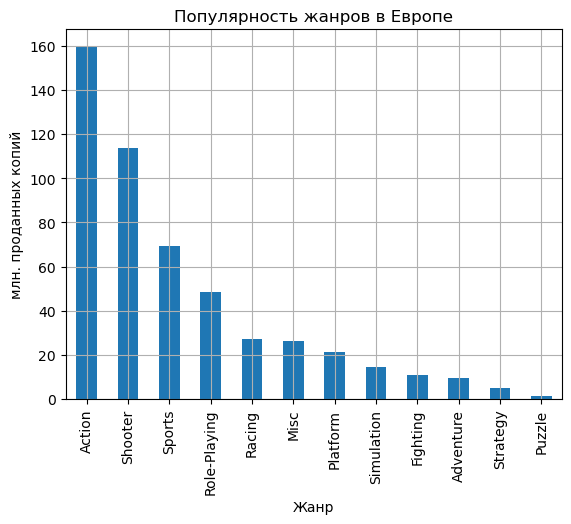

In [64]:
df_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).plot(kind='bar', grid=True)
plt.title('Популярность жанров в Европе')
plt.ylabel('млн. проданных копий')
plt.xlabel('Жанр')
plt.show()

**Топ 5** в Европе:
1. Action - 31.4%
2. Shooter - 22.4%
3. Sports - 13.6%
4. Role-Plaing - 9.6%
5. Racing - 5.4%

Общая доля рынка, принадлежащая топовым жанрам - 77%

##### Самые популярные платформы в Японии

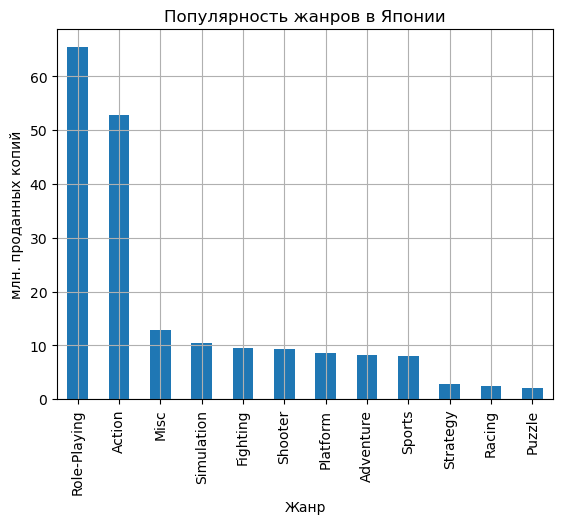

In [65]:
df_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).plot(kind='bar', grid=True)
plt.title('Популярность жанров в Японии')
plt.ylabel('млн. проданных копий')
plt.xlabel('Жанр')
plt.show()

**Топ 5** в Японии:
1. Role-Plaing - 34.0%
2. Action - 27.4%
3. Misc - 6.7%
4. Simulation - 5.4%
5. Fighting - 4.9%

Общая доля рынка, принадлежащая топовым жанрам - 78.4%

**Выводы:**

1. Во всех трех регионах по продажам **экшн-игры заниают 1 или 2 место**.
2. Самое неравномерное распределение **в Японии, 61,4% рынка** занимают всего 2 жанра: **Экшн и Ролевые игры**.
3. Топы жанров в Северной Америке и Европе схожи, содержат 4 общих жанра и отличаются от Японского топа.

#### Влияение рейтинга ESRB на продажи

##### Влияение рейтинга ESRB на продажи в Северной Америке

In [66]:
df_actual.groupby('rating')['na_sales'].sum()

rating
E          114.37
E10+        75.70
M          231.57
T           66.02
unknown    103.31
Name: na_sales, dtype: float64

##### Влияение рейтинга ESRB на продажи в Европе

In [67]:
df_actual.groupby('rating')['eu_sales'].sum()

rating
E          113.02
E10+        55.37
M          193.96
T           52.96
unknown     91.50
Name: eu_sales, dtype: float64

##### Влияение рейтинга ESRB на продажи в Японии

In [68]:
df_actual.groupby('rating')['jp_sales'].sum()

rating
E           28.33
E10+         8.19
M           21.20
T           26.02
unknown    108.84
Name: jp_sales, dtype: float64

**E** - для всех, 0+

**E10+** - для всех, 10+

**M** - для взрослых, 17+

**T** - для подростков

**Вывод:**

Снова видим схожесть рынков Северной Америки и Европы и их отличие от рынка Японии. На рынках **Северой Америки и Европы** больше всего продаются **игры для взрослых (17+)**, практически **в два раза чаще**, чем игры **для всех (0+)**, еще **в два раза реже** встречаются **игры 10+ и для подростков**. Игр **без категории** в обеих странах около **18%**.

На **Японском** рынке **преобладают** продажи игр **для всех и для подростков**, **меньше** всего продаж у игр **10+**. Игр **без категории** больше половины - около **56%**.

### Проверка гипотез

#### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Нулевая гипотеза:**

Средние пользовательские рейтинги платформ Xbox One и PC *одинаковые*

**Альтернативная гипотеза:**

Средние пользовательские рейтинги платформ Xbox One и PC *различаются*

Подготовим данные:

In [69]:
df_actual_XOne = df_actual.query('platform == "XOne"')

In [70]:
df_actual_XOne['user_score'].isna().sum()

65

In [71]:
df_actual_XOne = df_actual_XOne.dropna(subset=['user_score'])
df_actual_XOne.reset_index(drop=True, inplace=True)

In [72]:
df_actual_XOne['user_score'].isna().sum()

0

In [73]:
df_actual_PC = df_actual.query('platform == "PC"')

In [74]:
df_actual_PC['user_score'].isna().sum()

44

In [75]:
df_actual_PC = df_actual_PC.dropna(subset=['user_score'])
df_actual_PC.reset_index(drop=True, inplace=True)

In [76]:
df_actual_PC['user_score'].isna().sum()

0

Проведем статистический тест

In [77]:
alpha = 0.05

results = st.ttest_ind(df_actual_XOne['user_score'], df_actual_PC['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


**Вывод:**

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

#### Средние пользовательские рейтинги жанров Action и Sports разные

**Нулевая гипотеза:**

Средние пользовательские рейтинги жанров Action и Sports *одинаковые*

**Альтернативная гипотеза:**

Средние пользовательские рейтинги платформ Xbox One и PC *разные*

Подготовим данные:

In [78]:
df_actual_action = df_actual.query('genre == "Action"')

In [79]:
df_actual_action['user_score'].isna().sum()

508

In [80]:
df_actual_action = df_actual_action.dropna(subset=['user_score'])
df_actual_action.reset_index(drop=True, inplace=True)

In [81]:
df_actual_action['user_score'].isna().sum()

0

In [82]:
df_actual_sports = df_actual.query('genre == "Sports"')

In [83]:
df_actual_sports['user_score'].isna().sum()

73

In [84]:
df_actual_sports = df_actual_sports.dropna(subset=['user_score'])
df_actual_sports.reset_index(drop=True, inplace=True)

In [85]:
df_actual_sports['user_score'].isna().sum()

0

Проведем статистический тест

In [86]:
alpha = 0.05

results = st.ttest_ind(df_actual_action['user_score'], df_actual_sports['user_score'])

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.804523380462917e-26
Отвергаем нулевую гипотезу


**Вывод:**

Средние пользовательские рейтинги жанров Action и Sports *разные*

Пояснения:

*1. Как вы сформулировали нулевую и альтернативную гипотезы?*

Нулевая гипотеза сформулирована в задании, ее необходимо проверить: подтвердить или опровергнуть.

*2. Какой критерий применили для проверки гипотез и почему?*

Приведенные гипотезы являются гипотезами о равенстве средних двух генеральных совокупностей, поэтому для их проверки в обоих случаях был применен статистический тест ttest_ind.

### Общий вывод

В ходе исследования были рассмотрены тенденции **за последние 5 лет**.

**1. Результаты <ins>исследовательского анализа</ins> данных:**

1.1 Средняя продолжительность актуальности платформы составляет **6 лет**.

1.2 **Актуальные платформы:** PS3, PS4, XOne, Wii, 3DS, X360, PSV, PC, WiiU, DS, PSP.

1.3 **Наиболее перспективными** платформами, в порядке убывания, являются **X360, WiiU, XOne, PS4, PS3, Wii**.

1.4 Зависимость количества проданных копий **от оценок критиков и игроков** меняется от платформы к платформе.

1.5 В среднем: зависимость количества проданных копий **от оценок игроков не прослеживается** (коэффициент корреляции **0.06**).

1.6 В среднем: зависимость количества проданных копий **от оценок критиков положительная**, но **относительно слабая** (коэффициент корреляции **0.32**).

1.7 Медианное значение количества проданных копий **выше всего у шутеров, спортивных игр и платформеров**.

1.8 Самые **низкие показатели** медианы продаж у **приключенческих игр**, при их большом количестве.

1.9 Жанр **экшены** лидирует по количеству выпущенных игр и суммарным продажам, **но** в среднем игры этого жанра продаются хуже, чем бо́льшая часть игр других жанров.


**2. <ins>Портреты</ins> пользователей разных регионов:**

Рынки игр Северной Америки и Европы хоть и имеют некоторые различия, но во многом схожи и достаточно сильно отличаются от Японского рынка игр. Подробные портреты пользователей (топ-5 платформ и топ-5 жанров) представлены в исследовании, глава 4.

2.1 Во всех трех регионах наблюдаются различия в популярных платформах:
* в Северной Америке - **X360**
* в Европе - **PS4**
* в Японии - **3DS**

2.2 Во всех трех регионах наблюдаются **общая популярная платформа - PS3**

2.3 Самое неравномерное распределение **в Японии почти 50% рынка** занимает всего 1 платформа: **3DS**.

2.4 Топы платформ в Северной Америке и Европе схожи, содержат одинаковый список платформ и отличаются от Японского топа.

2.5 Во всех трех регионах по продажам **экшн-игры занимают 1 или 2 место**.

2.6 Самое неравномерное распределение **в Японии, 61,4% рынка** занимают всего 2 жанра: **Экшн и Ролевые игры**.

2.7 Топы жанров в Северной Америке и Европе схожи, содержат 4 общих жанра и отличаются от Японского топа.

2.8 На рынках **Северой Америки и Европы** больше всего продаются **игры для взрослых (17+)**, практически **в два раза чаще**, чем игры **для всех (0+)**, еще **в два раза реже** встречаются **игры 10+ и для подростков**. Игр **без категории** в обеих странах около **18%**.

2.9 На **Японском** рынке **преобладают** продажи игр **для всех и для подростков**, **меньше** всего продаж у игр **10+**. Игр **без категории** больше половины - около **56%**.

**3. Проверка <ins>гипотез</ins>**

Обе предполагаемые гипотезы подтвердились:

**Средние пользовательские рейтинги платформ Xbox One и PC <ins>одинаковые</ins>.**

**Средние пользовательские рейтинги жанров Action и Sports <ins>разные</ins>.**